# Stochastic
This notebook contains blocks of codes to run stochastic modeling analyses part
of Avila et al

In [2]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mcsr_vec import run_sim_steady_state_vec as rss_vec
from mcsr import run_sim

## Scenario 1

Scenario random 

In [3]:
np.random.seed(614)

par = rss_vec('param_steady.json', 'target.json', tolerance=1e-5,
          mode='random')

In [4]:
# Unpack results
Jriv = par['Jriv']
Rriv = par['Rriv']
Jh = par['Jh']
Rh = par['Rh']
age = par['age']

# Index of non-zero results
non_zero = np.where(Jriv!=0)

# Steady state Rsw
Rsw = np.zeros_like(Jriv)
Rsw[non_zero] = ((Jriv[non_zero]*Rriv[non_zero] + Jh[non_zero]*Rh[non_zero])
                 / (Jriv[non_zero] + Jh[non_zero]))

In [9]:
# Comparing Target Json
with open('target.json', 'r') as f:
    target = json.load(f)

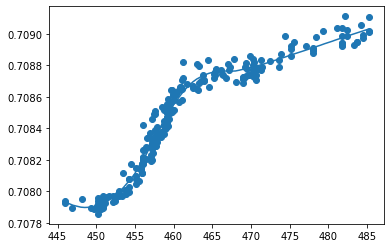

In [10]:
sr = pd.read_excel('mastersr.xlsx')

plt.scatter(sr['age'], sr['sr'])
plt.plot(target['age'], target['sr'])